In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from wrangle import wrangle_zillow


import warnings
warnings.filterwarnings("ignore")

# Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [8]:
train, validate, test = wrangle_zillow()

In [24]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips
10057,4.0,2.0,1561.0,248240.0,1973,6059
2004970,3.0,2.0,1770.0,88390.0,1960,6037
306031,2.0,1.0,1452.0,81169.0,1946,6037
1038595,3.0,1.0,1000.0,119174.0,1950,6037
270959,3.0,2.0,1974.0,432268.0,1988,6037


# Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [35]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg')

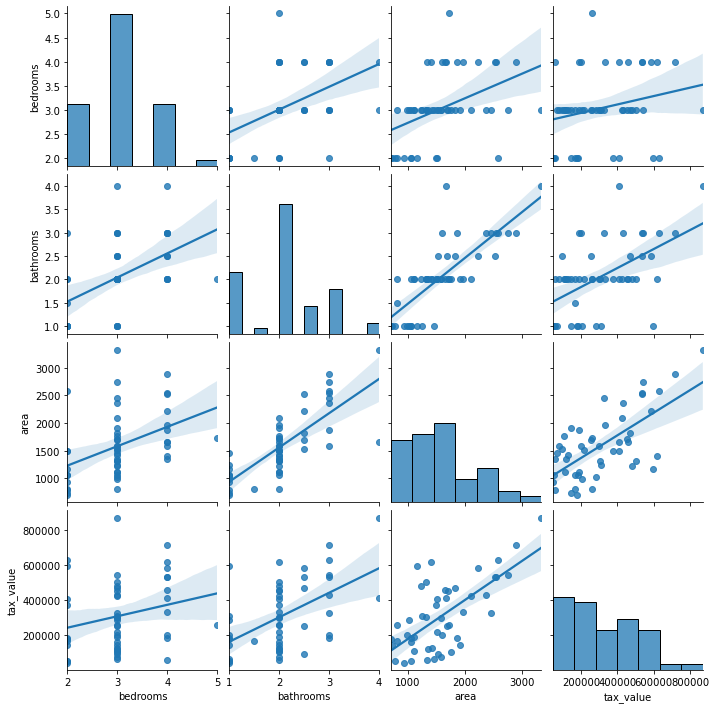

In [38]:
plot_variable_pairs(train.drop(columns=['fips', 'year_built']).sample(50))

# Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

    I am using the zillow data set so I will convert area from sq feet to square meters

1 square foot = 0.092903 meters

In [4]:
train.area.head()

10057      1561.0
2004970    1770.0
306031     1452.0
1038595    1000.0
270959     1974.0
Name: area, dtype: float64

In [9]:
area_in_meters = train.area * .092903

In [10]:
area_in_meters

10057      145.021583
2004970    164.438310
306031     134.895156
1038595     92.903000
270959     183.390522
              ...    
991122     111.390697
1707759    172.706677
1770246    198.069196
1500741     72.464340
843328     105.166196
Name: area, Length: 1038959, dtype: float64

# Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  object 
 5   fips        1038959 non-null  object 
dtypes: float64(4), object(2)
memory usage: 87.7+ MB


In [19]:
train.columns[:4]

Index(['bedrooms', 'bathrooms', 'area', 'tax_value'], dtype='object')

In [20]:
cols = train.columns[:4]
descriptive = {'tax_value': 'Tax ($)',
              '':''}

In [21]:
def plot_variable_pairs(train, cols, descriptive=None, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line. If passed a descriptive
    dictionary, converts axis titles to the corresponding names.
    '''
    # sets line-plot options and scatter-plot options
    keyword_arguments={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}}
    
    # creates pairplot object
    pairplot = sns.pairplot(train[cols], hue=hue, kind="reg",\
            plot_kws=keyword_arguments)
    
    # if passed a descriptive dictionary, iterates through matplotlib axes
    # in our pairplot object and sets their axis labels to the corresponding 
    # strings.
    if descriptive:
        for ax in pairplot.axes.flat:
            ax.set_xlabel(descriptive[ax.get_xlabel()])
            ax.set_ylabel(descriptive[ax.get_ylabel()])
    
    # Adds a super-title
    pairplot.fig.suptitle('Correlation of Continuous Variables', y=1.08)
    plt.show()

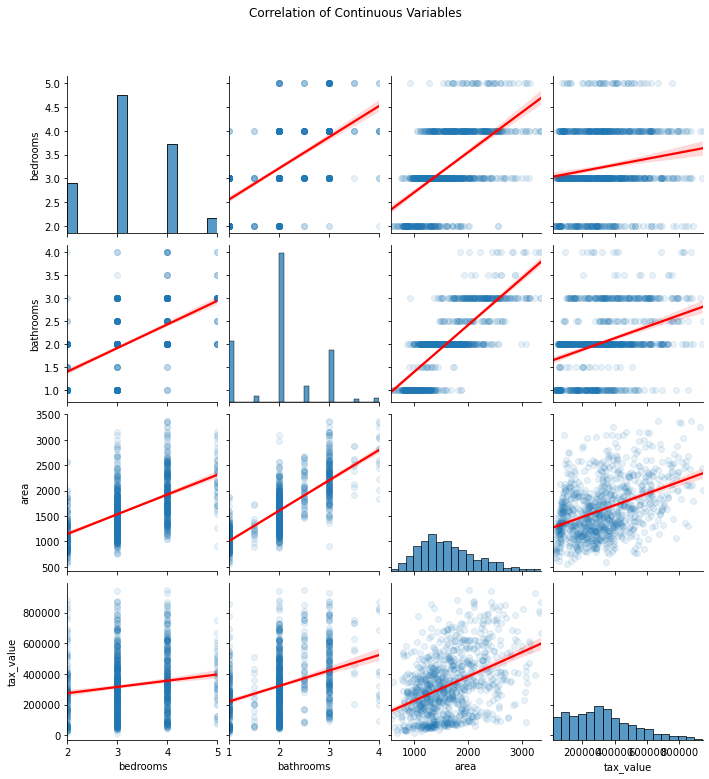

In [33]:
plot_variable_pairs(train.sample(1000), cols)

In [25]:
def plot_pairplot(train, cols, descriptive=None, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    pairplot = sns.pairplot(train[cols], corner=True)
    pairplot.axes.flat[0].set_ylabel(cols[0])
    if descriptive:
        for ax in pairplot.axes.flat:
            if ax:
                ax.set_xlabel(descriptive[ax.get_xlabel()])
                ax.set_ylabel(descriptive[ax.get_ylabel()])
    pairplot.fig.suptitle('Correlation of Continuous Variables', y=1.08)
    plt.show()

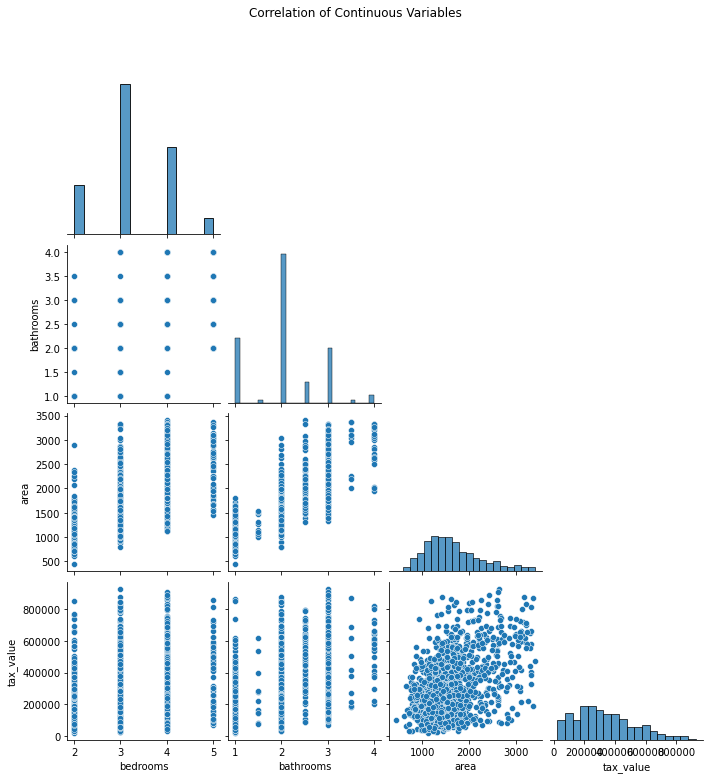

In [32]:
plot_pairplot(train.sample(1000), cols)

In [30]:
def create_heatmap(train, cols, descriptive=None):
    corr_matrix = train[cols].corr()
    
    kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}
    labels = pd.Series(cols)
    if descriptive:
        labels = labels.map(descriptive)
    plt.figure(figsize=(8,6))
    heatmap = sns.heatmap(corr_matrix, cmap='Purples', annot=True, \
                          xticklabels=labels, yticklabels=labels, **kwargs)
    plt.ylim(0, 3)
    plt.title('Correlation of Continuous Variables')
    plt.show()

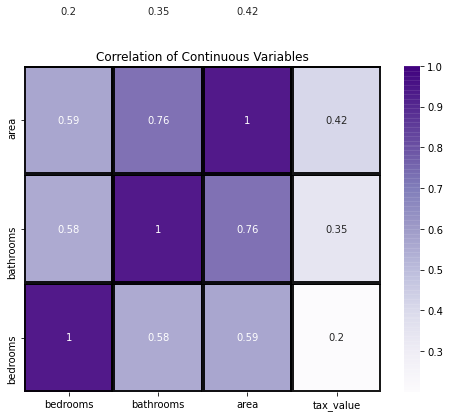

In [31]:
create_heatmap(train, cols)

In [34]:
def plot_categorical_and_continuous_vars(categorical_vars, continuous_vars, df, descriptive=None):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    for categorical_var in categorical_vars:
        for continuous_var in continuous_vars:
            categorical_label = categorical_var
            continuous_label = continuous_var

            if descriptive:
                categorical_label = descriptive[categorical_var]
                continuous_label = descriptive[continuous_var]
                
            fig, axes = plt.subplots(figsize=(12,36), nrows=4,ncols=1)
            fig.suptitle(f'{continuous_label} by {categorical_label}', fontsize=18, y=1.02)

            sns.lineplot(ax=axes[0], x=categorical_var, y=continuous_var, data=df)
            axes[0].set_title('Line Plot', fontsize=14)
            axes[0].set_xlabel(categorical_label, fontsize=12)
            axes[0].set_ylabel(continuous_label, fontsize=12)
            
            sns.boxplot(ax=axes[1], x=categorical_var, y=continuous_var, data=df,\
                        color='blue')
            axes[1].set_title('Box-and-Whiskers Plot', fontsize=14)
            axes[1].set_xlabel(categorical_label, fontsize=12)
            axes[1].set_ylabel(continuous_label, fontsize=12)
            
            sns.swarmplot(ax=axes[2], x=categorical_var, y=continuous_var, data=df,\
                        palette='Blues')
            axes[2].set_title('Swarm Plot', fontsize=14)
            axes[2].set_xlabel(categorical_label, fontsize=12)
            axes[2].set_ylabel(continuous_label, fontsize=12)
            
            sns.barplot(ax=axes[3], x=categorical_var, y=continuous_var, data=df,\
                        palette='Purples')
            axes[3].set_title('Bar Plot', fontsize=14)
            axes[3].set_xlabel(categorical_label, fontsize=12)
            axes[3].set_ylabel(continuous_label, fontsize=12)
            
            plt.tight_layout()

            plt.show()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  object 
 5   fips        1038959 non-null  object 
dtypes: float64(4), object(2)
memory usage: 87.7+ MB


In [52]:
train['larger_area'] = np.where(train.area > train.area.median(), 'large house', 'small house')

In [64]:
# Usable information
train.groupby('larger_area').area.median()

larger_area
large house    1988.0
small house    1232.0
Name: area, dtype: float64

Good know above

In [65]:
train['tax_range'] = np.where(train.tax_value > train.tax_value.median(), 'large tax', 'small tax')

In [53]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips,larger_area
10057,4.0,2.0,1561.0,248240.0,1973,6059,large house
2004970,3.0,2.0,1770.0,88390.0,1960,6037,large house
306031,2.0,1.0,1452.0,81169.0,1946,6037,small house
1038595,3.0,1.0,1000.0,119174.0,1950,6037,small house
270959,3.0,2.0,1974.0,432268.0,1988,6037,large house


In [49]:
train.drop(columns=['area', 'fips']).columns

Index(['bedrooms', 'bathrooms', 'tax_value', 'year_built'], dtype='object')

In [55]:
cats = ['larger_area']
cont = train.drop(columns=['year_built', 'fips']).columns

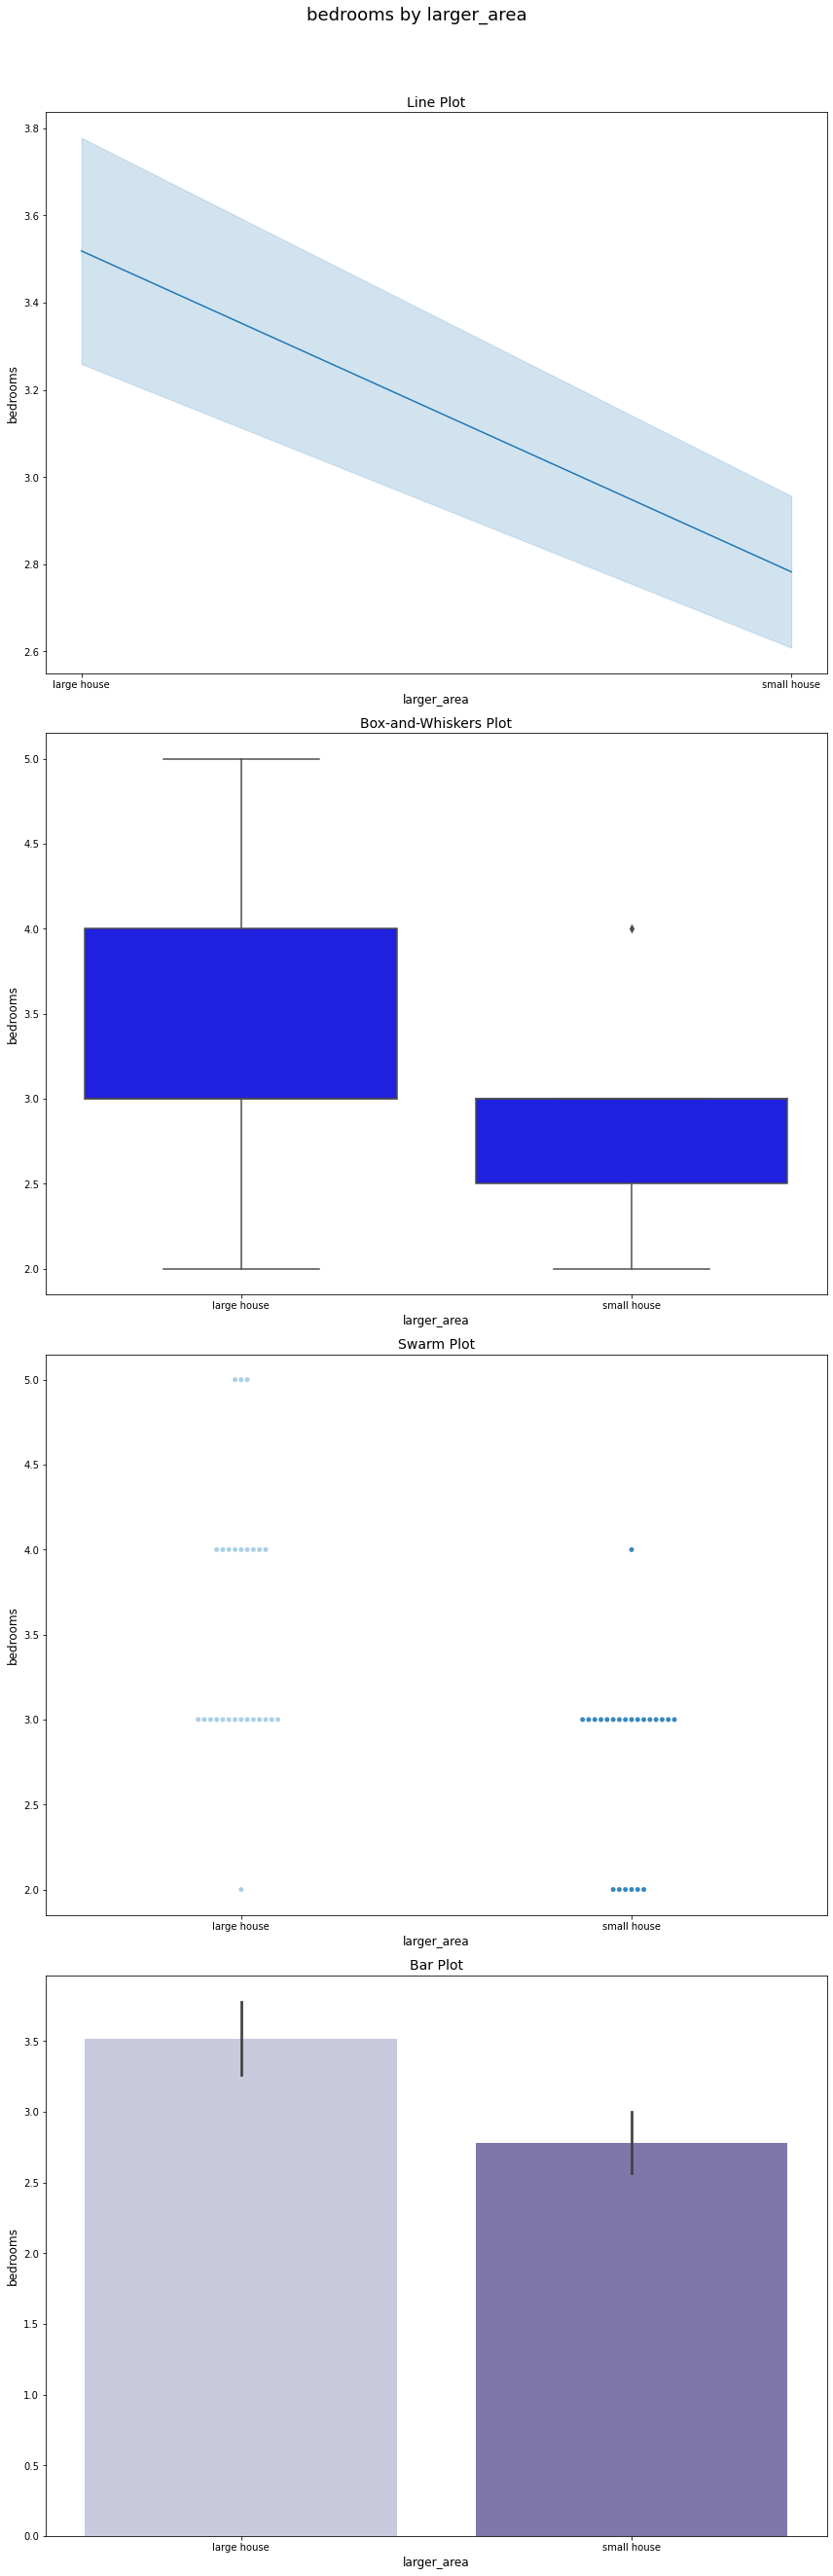

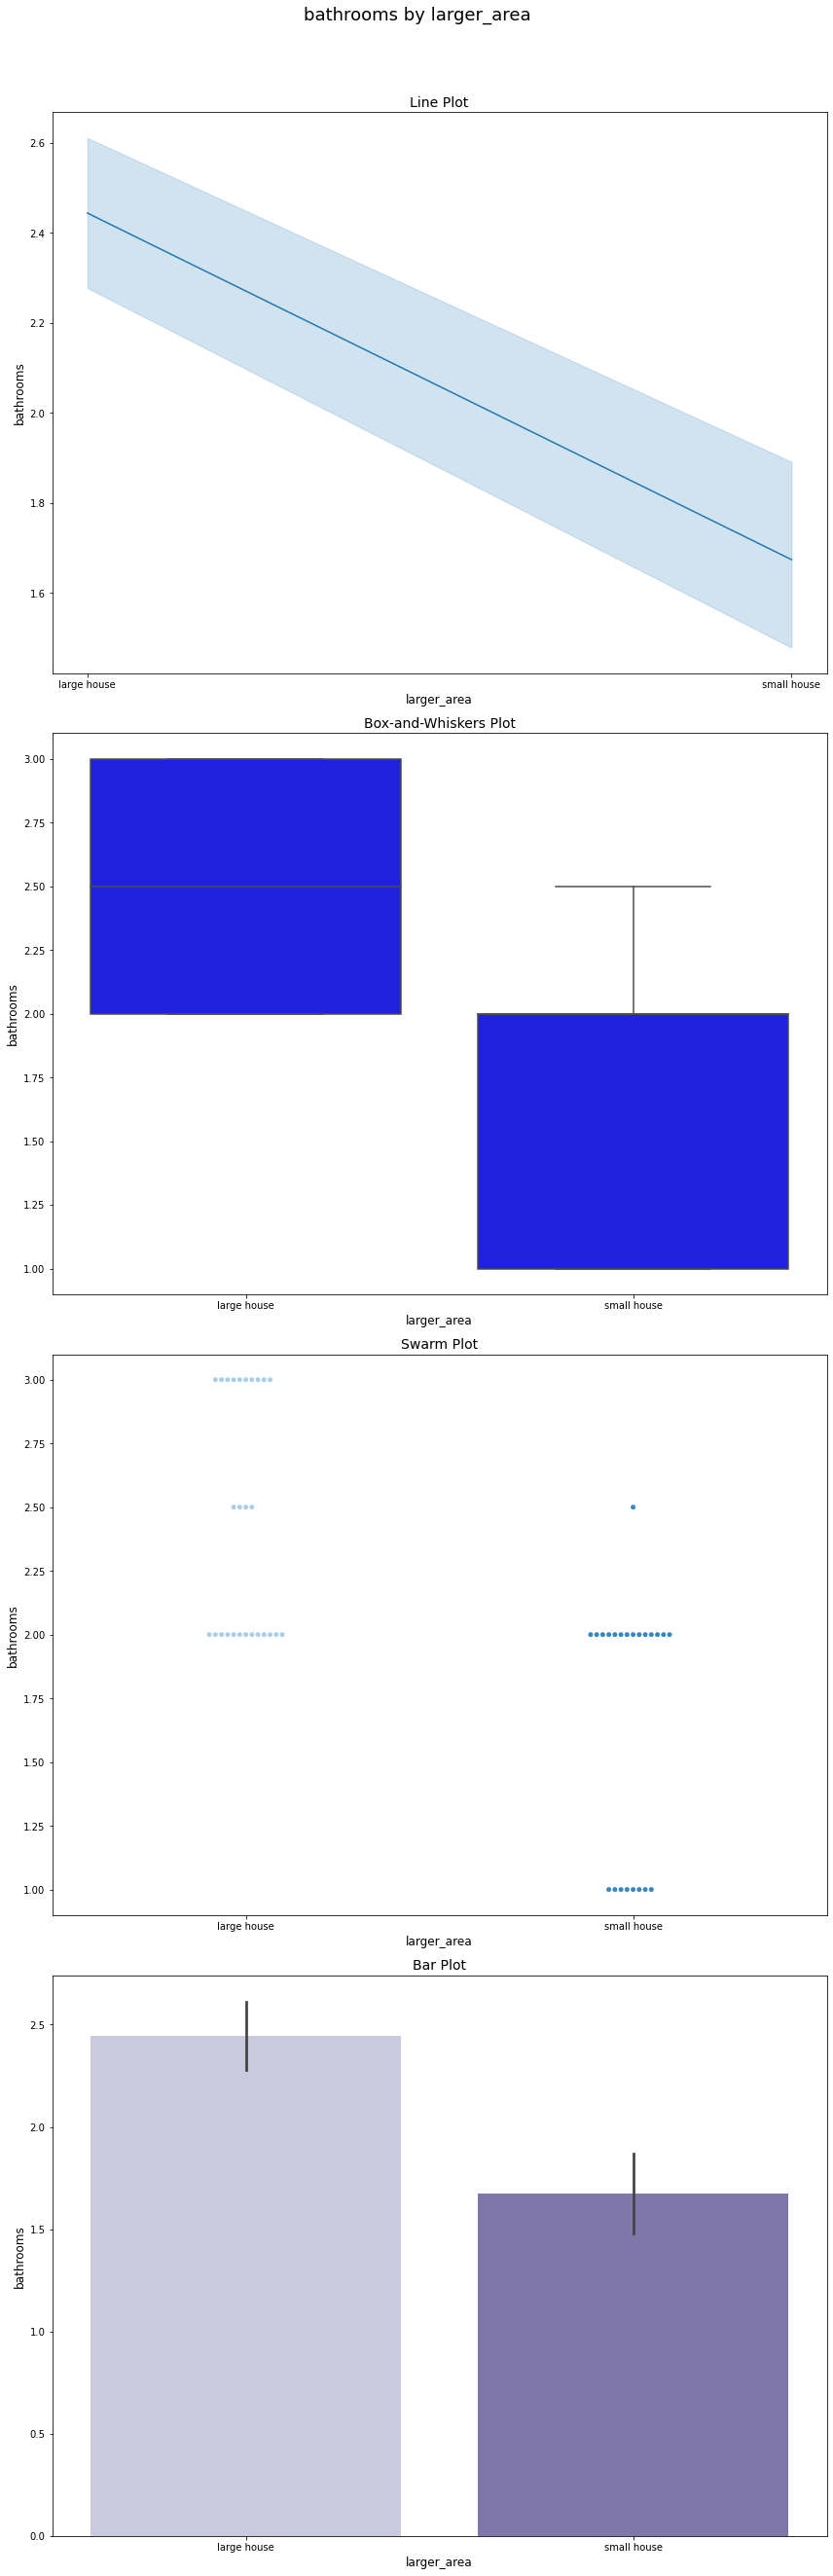

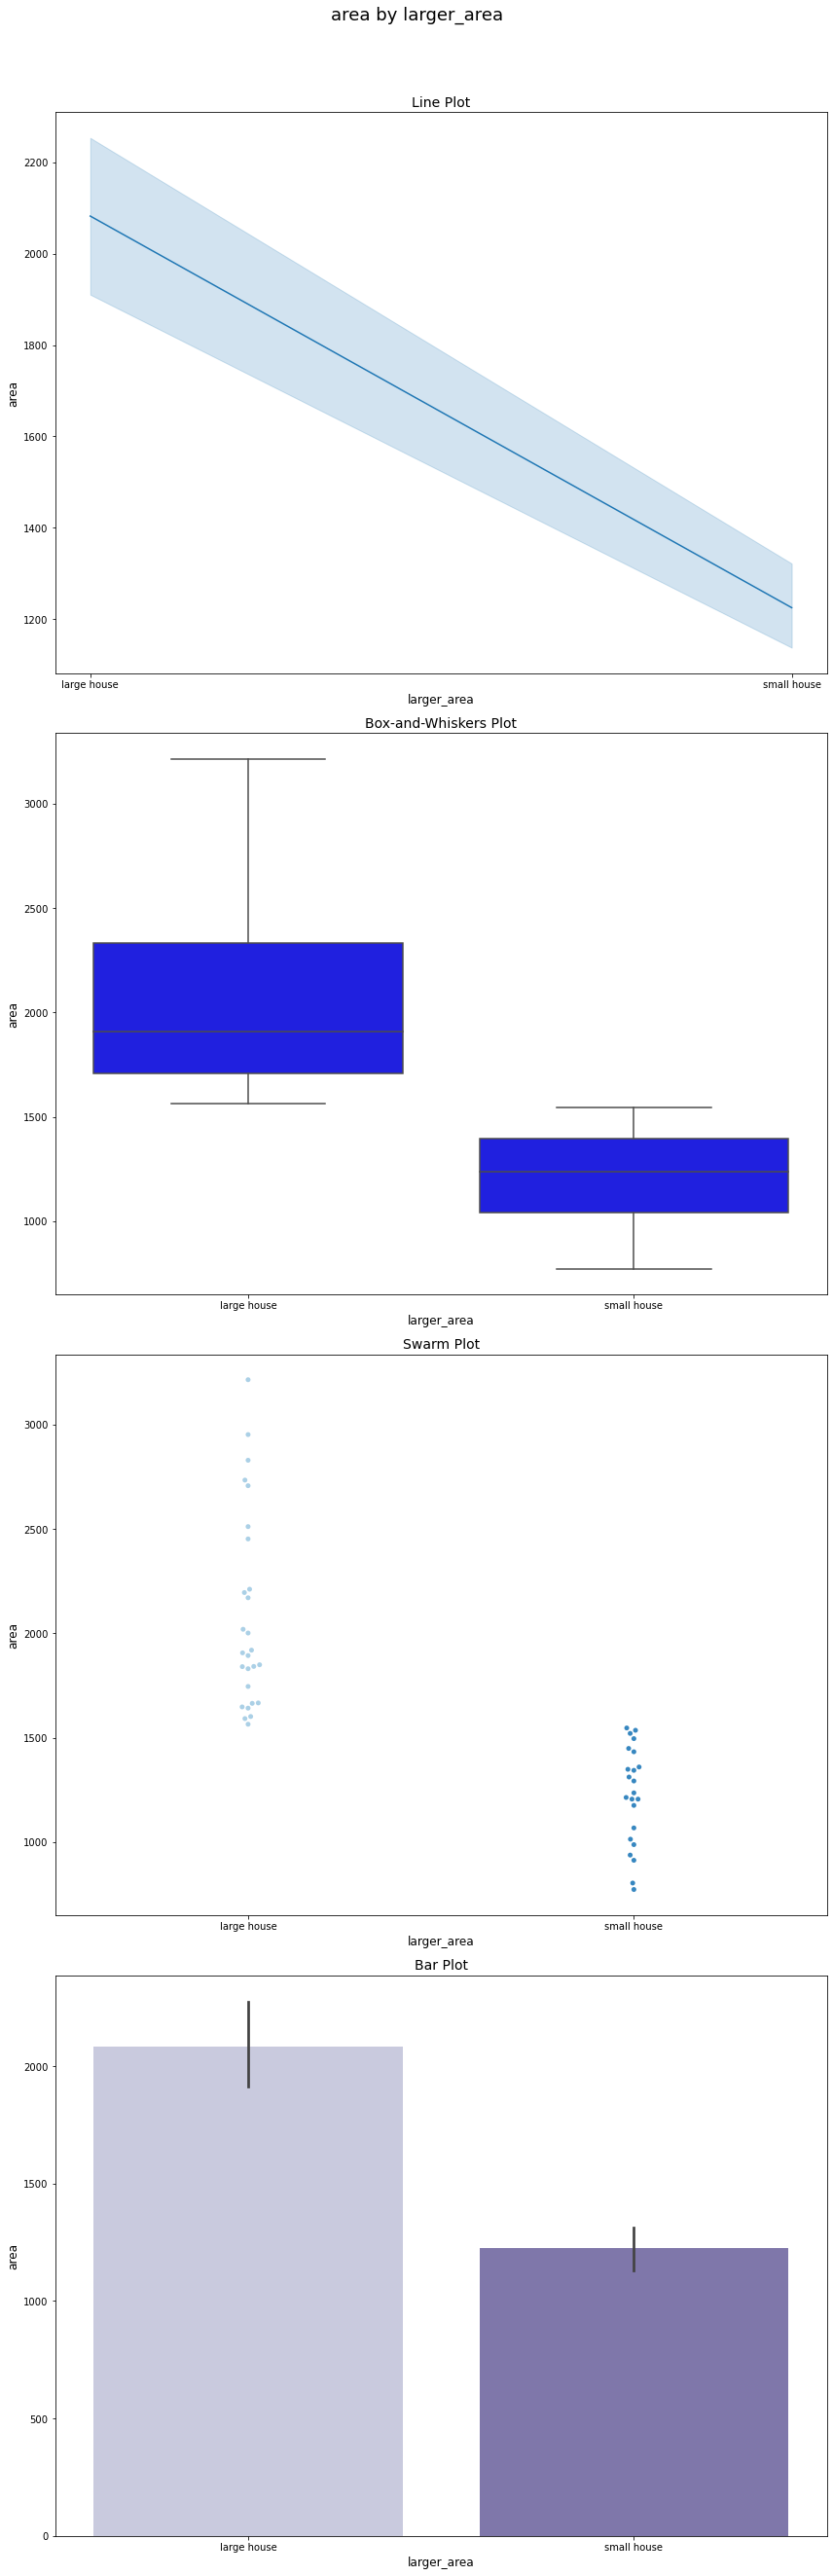

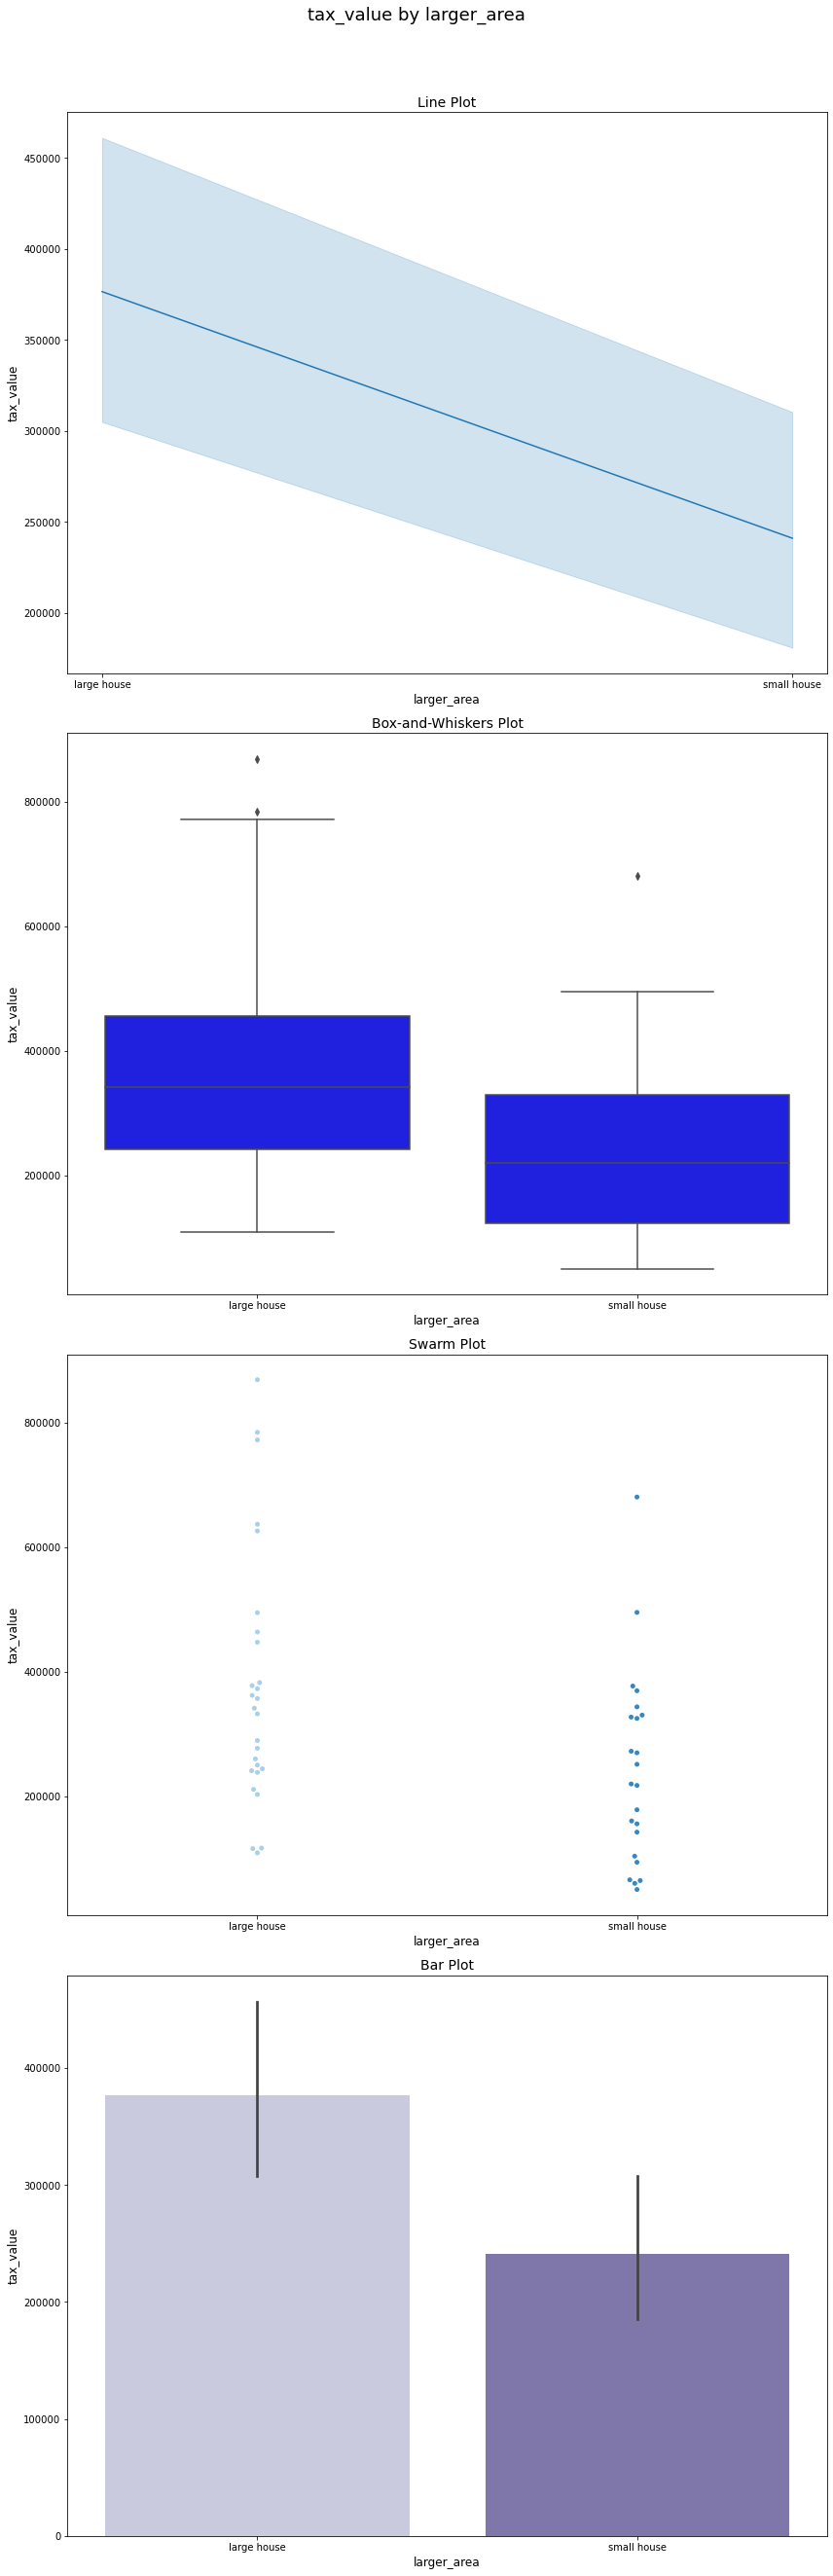

TypeError: Neither the `x` nor `y` variable appears to be numeric.

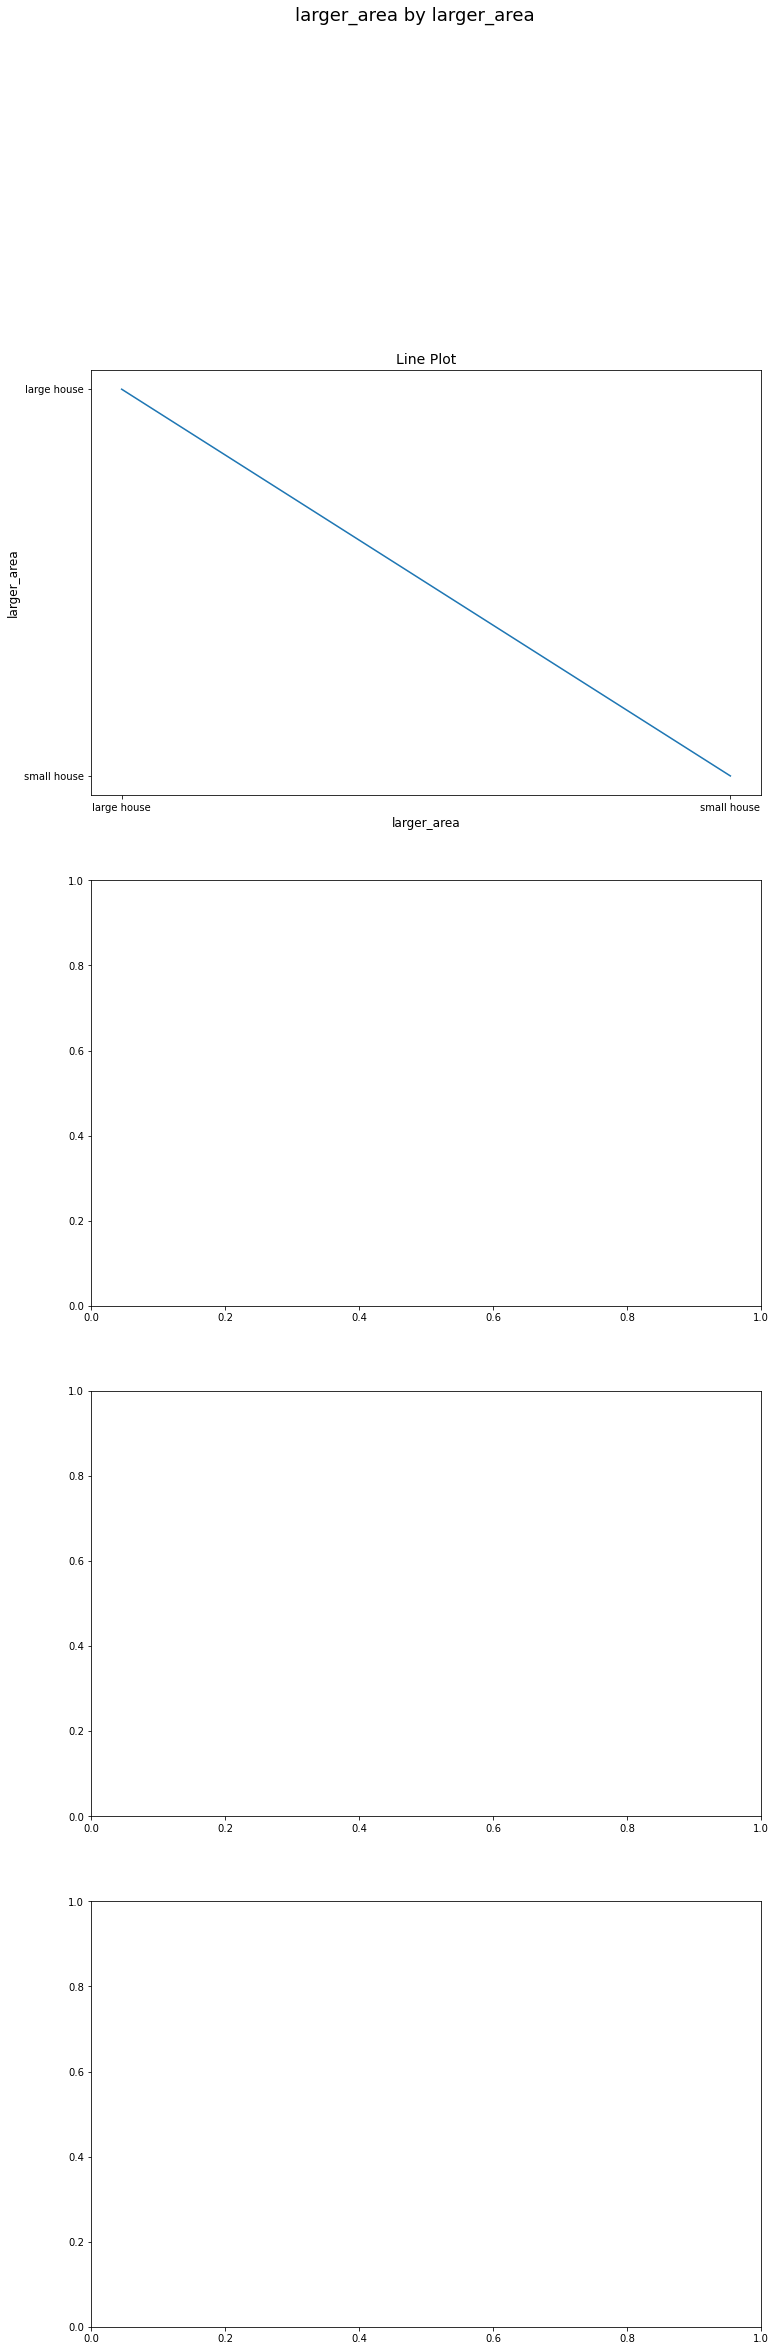

In [56]:
plot_categorical_and_continuous_vars(cats, cont, train.sample(50))

# Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

# In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.